# Post-treatement on internal plane

In [1]:
from trustutils import run 

run.introduction("Jean Maillard (Student of U.Bieder in 2017)","13/04/2021")

## Introduction 
 Validation made by : Jean Maillard (Student of U.Bieder in 2017)



 Report created : 13/04/2021



 Report generated 26/01/2022

## Description
We study two methods for observing the velocity field on any section of the domain. The first method uses TRUST with **Extraire\_surface** and **Transformation**. The second method uses the **Slice** operator and the **Expression** function under VisIt.\
We are in the case of a flow in a periodic cylinder, oriented along the axis $(Oz)$, where we know the analytical solution. We try to isolate the error due to the interpolation, which occurs during the post-processing. 

* Cylinder dimensions: Radius 5 cm; Height 15 cm
* nb_pas_dt_max 0
* projection_initiale 0
* Boundary Conditions : \
Inlet/Outlet: **periodique** \
External surface: **paroi_defilante champ_front_fonc_xyz** $3 \; -20y \;  20x \; 0$
* Initial conditions: We initially impose a speed composed of a rotation around the axis $(Oz)$ to $\omega = 20 rad/s$ and a parabolic profile corresponding to the analytical solution of a laminar flow in a tube according to $(Oz)$. \\ \textbf{vitesse champ\_fonc\_xyz dom} $\; 3 \;\; -20y \;\; 20x \;\; 2*(1-(x^2+y^2)/(5^{-2})^2)$ 

In [2]:
run.TRUST_parameters("1.7.5")

### TRUST parameters 
 * Version TRUST: 1.7.5
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/jupyter/HowTo/Postreatment_internal_plane/build)

In [3]:
from trustutils import run 
c1 = run.addCase("."    ,"cylindre_tourbillon.data")
run.printCases()
run.runCases()

### Test cases 
* ./cylindre_tourbillon.data : 


Running **with Sserver**...
  => A total of 1 cases were (successfully) run in 12.7s.


## How to postreat an horizontal cut plane, perpendicular to (Oz)
The cylinder is cut perpendicularly to $(Oz)$, and the total velocity, normal velocity and tangential velocity vectors are observed with TRUST and VisIt. The objective is to compare the post-processing of these two codes. In the following, this cut plane is called 'coupe1'.

### Visualisation of a cut plane via Extraire_surface

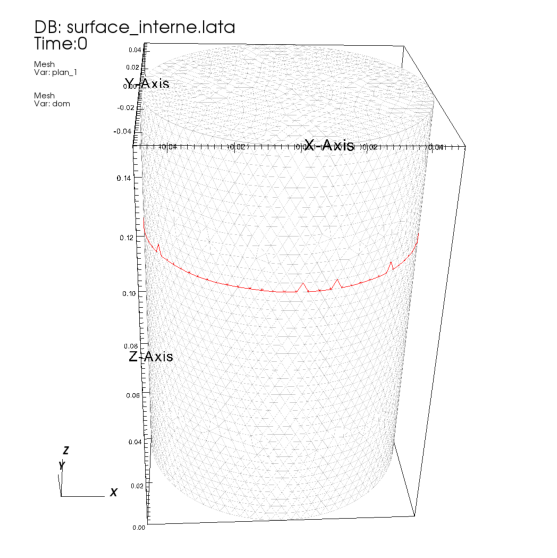

In [4]:
from trustutils import visit
a=visit.Show("./surface_interne.lata","Mesh","plan_1")
a.normal3D([-0.088,-0.86,0.50])
a.up3D([0.0097,0.504,0.863])
a.meshColor('red') 
a.addField(field="Mesh",name="dom")
a.meshTrans()
a.plot()

### Total velocity vector
The calculated velocity field is plotted

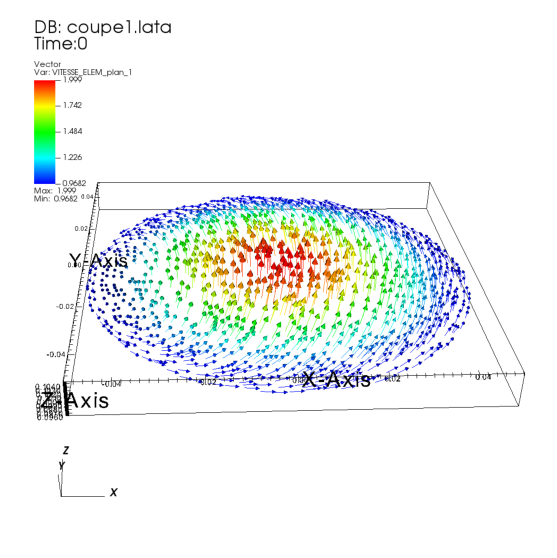

In [5]:
from trustutils import visit
a = visit.Show("coupe1.lata","Vector","VITESSE_ELEM_plan_1",time=0,mesh='plan_1',plotmesh=False)
a.normal3D([-0.088,-0.86,0.50])
a.up3D([0.0097,0.504,0.863])
a.plot()

### Normal velocity
We use the **Transformation** function to projet the velocity according to (Oz): $V_n = (0,0,V_z)$

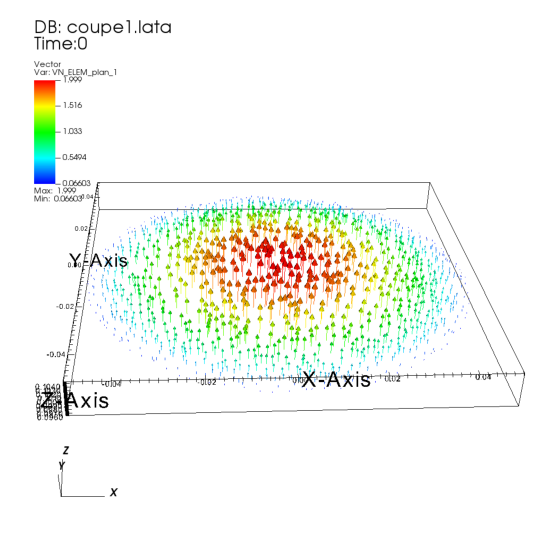

In [6]:
from trustutils import visit
S = visit.Show("coupe1.lata","Vector","VN_ELEM_plan_1",time=0,mesh='plan_1',plotmesh=False)
S.normal3D([-0.088,-0.86,0.50])
S.up3D([0.0097,0.504,0.863])
S.visitCommand("f=open('Coupe1_extrm_vn_trust','w')")
S.visitCommand("Query('Min', use_actual_data=1)")
S.visitCommand("f.write(str(GetQueryOutputValue()))")
S.visitCommand("f.write(\" \"+str(GetQueryOutputValue()))")
S.visitCommand("f.close()")
S.plot()

### Tangential velocity
We use the **Transformation** function to project the velocity in the plane $V_t=(V_x,V_y,0)$

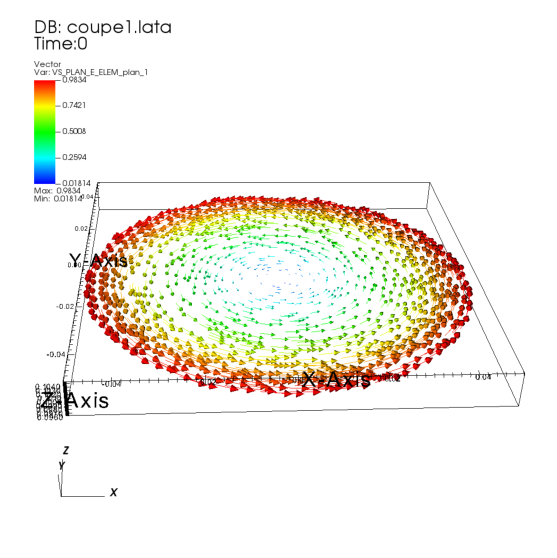

In [7]:
from trustutils import visit
S= visit.Show("coupe1.lata","Vector","VS_PLAN_E_ELEM_plan_1",time=0,mesh='plan_1',plotmesh=False)
S.normal3D([-0.088,-0.86,0.50])
S.up3D([0.0097,0.504,0.863])
S.visitCommand("f=open('Coupe1_extrm_trust','w')")
S.visitCommand("Query('Min', use_actual_data=1)")
S.visitCommand("f.write(str(GetQueryOutputValue()))")
S.visitCommand("f.write(\" \"+str(GetQueryOutputValue()))")
S.visitCommand("f.close()")
S.plot()

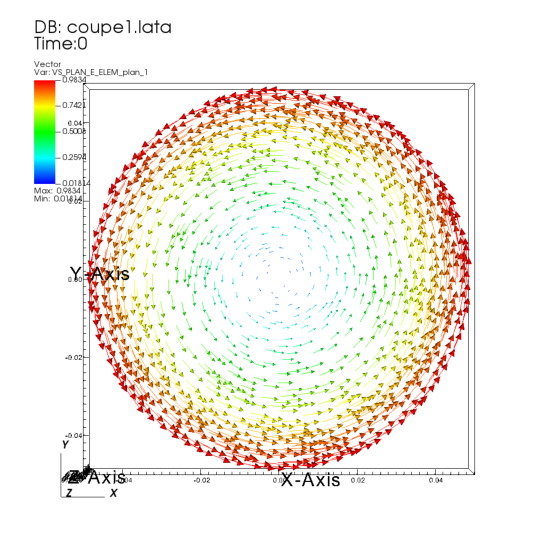

In [8]:
from trustutils import visit

a = visit.Show("coupe1.lata","Vector","VS_PLAN_E_ELEM_plan_1",time=0,mesh='plan_1',plotmesh=False)
a.plot()


### Cutting and projection with VisIt
With VisIt, we define the projected speed using control/expression and the components according to ($O_x$) and ($O_y$) of the interpolated speed to the elements. Then the cut plane is done with the slice operator.

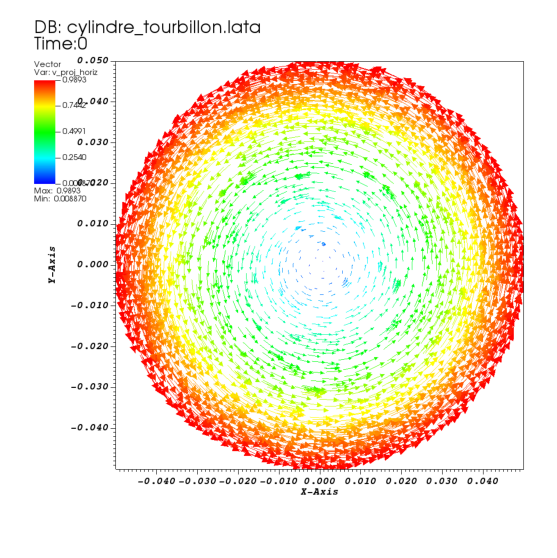

In [9]:
from trustutils import visit

a=visit.Show(time=0,empty=True)

a.visitCommand("OpenDatabase('cylindre_tourbillon.lata', 0)")
a.visitCommand("DefineVectorExpression('v_proj_horiz', '{VITESSE_X_ELEM_dom,VITESSE_Y_ELEM_dom,0}')")
a.visitCommand("AddPlot('Vector', 'v_proj_horiz', 1, 0)")
a.slice(origin=[0,0,0.1],normal=[0,0,1.],type_op='slice_2D')
    
a.visitCommand("DrawPlots()")

a.visitCommand("f=open('Coupe1_extrm_visit','w')")
a.visitCommand("Query('Min', use_actual_data=1)")
a.visitCommand("f.write(str(GetQueryOutputValue()))")
a.visitCommand("Query('Max', use_actual_data=1)")
a.visitCommand("f.write(' '+str(GetQueryOutputValue()))")
a.visitCommand("f.close()")
a.plot()


In [10]:
from trustutils import visit

#On recupere le debit min et max
a=visit.Show('cylindre_tourbillon.lata','Pseudocolor','VITESSE_Z_ELEM_dom',time=0,show=False)

a.slice(origin=[0,0,0.1],normal=[0,0,1.],type_op='slice_2D')

a.visitCommand("f=open('Coupe1_debit','w')")
#on recupere le debit calcule sur coupe 1 avec trust
a.visitCommand("fichierDebT=open('cylindre_tourbillon_DEBIT_PLAN1.son','r')")
a.visitCommand("DebT=fichierDebT.read()")
a.visitCommand("f.write(DebT[len(DebT)-15:len(DebT)-1])")

# on calcul le débit avec visit
a.visitCommand("SetTimeSliderState(0)")
a.visitCommand("DrawPlots()")
a.visitCommand("Query('Average Value')")
a.visitCommand("res=GetQueryOutputValue()")
a.visitCommand("f.write(\" \"+str(res))")
a.visitCommand("f.close()")

# On récupère min et max de Vn
a.visitCommand("f=open('Coupe1_extrm_vn_visit','w')")
a.visitCommand("Query('Min', use_actual_data=1)")
a.visitCommand("f.write(str(GetQueryOutputValue()))")
a.visitCommand("Query('Max', use_actual_data=1)")
a.visitCommand("f.write(' '+str(GetQueryOutputValue()))")
a.visitCommand("f.close()")
a.plot()

## How to postreat a 45° sideway cut plane
A sideway cut plane is made at 45° in the cylinder, and the total speed, normal velocity, and tangetial velocity velocity to the plane are observed. In the following, this cut plane is called 'coupe2'.

### Visualization of a cut plane via Extract_surface

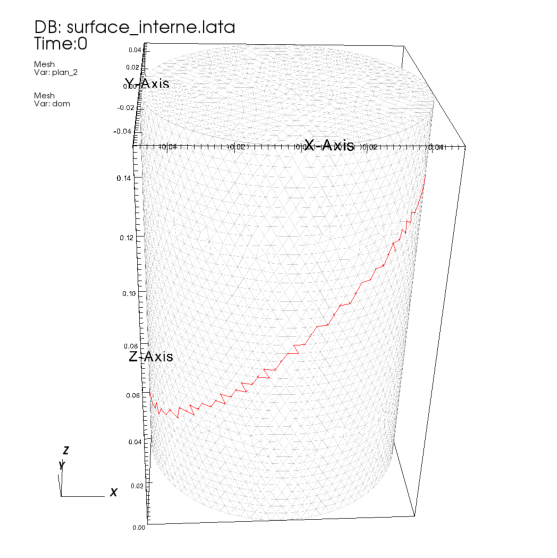

In [11]:
from trustutils import visit
a=visit.Show("./surface_interne.lata","Mesh","plan_2")
a.normal3D([-0.088,-0.86,0.50])
a.up3D([0.0097,0.504,0.863])
a.meshColor() 
a.addField(field="Mesh",name="dom")
a.meshTrans()
a.plot()

### Total velocity vector
The velocity field calculated on the elements is plotted on the sideway surface.

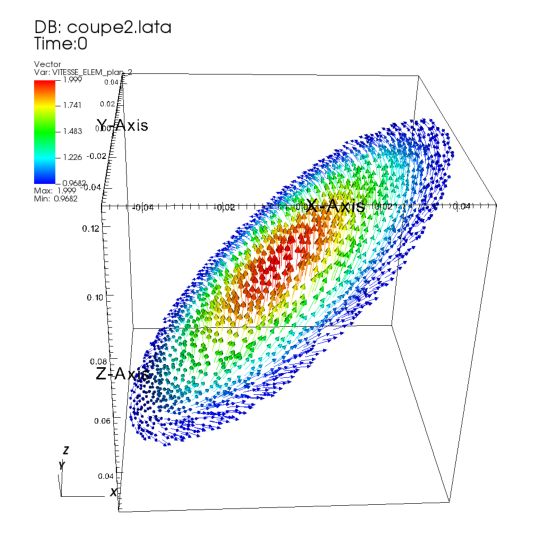

In [12]:
from trustutils import visit

a = visit.Show("coupe2.lata","Vector","VITESSE_ELEM_plan_2",time=0,mesh='plan_2',plotmesh=False)
a.normal3D([-0.088,-0.86,0.50])
a.up3D([0.0097,0.504,0.863])
a.plot()


### Normal velocity 
We use the function **Transformation** to project the velocity in the normal direction to the plane: $V_t=(V_x /2-V_z /2,0,-V_x /2+V_z /2)$

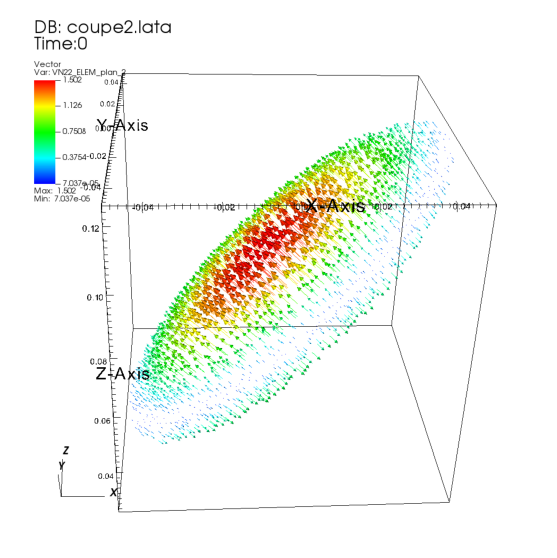

In [13]:
from trustutils import visit

a = visit.Show("coupe2.lata","Vector","VN22_ELEM_plan_2",time=0,mesh='plan_2',plotmesh=False)
a.normal3D([-0.088,-0.86,0.50])
a.up3D([0.0097,0.504,0.863])
a.plot()

### Tangential velocity
We use the **Transformation** function to project the velocity in the plan: $V_t=(V_x /2+V_z /2,V_y,V_x)$

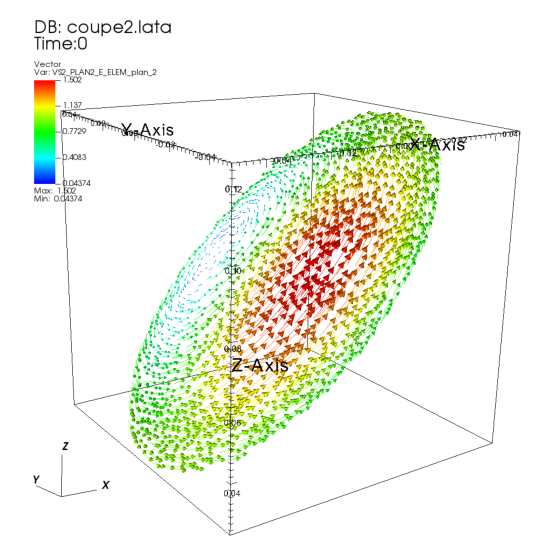

In [14]:
from trustutils import visit

a = visit.Show("coupe2.lata","Vector","VS2_PLAN2_E_ELEM_plan_2",time=0,mesh='plan_2',plotmesh=False)
a.normal3D([-0.5534,-0.778,0.298])
a.up3D([0.157,0.254,0.954])
a.plot()

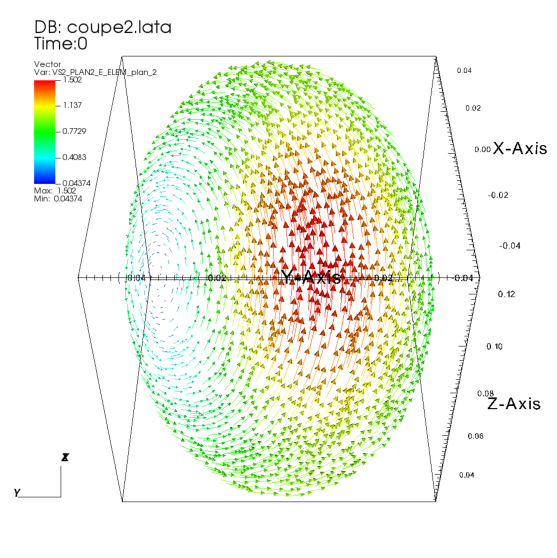

In [15]:
from trustutils import visit

a = visit.Show("coupe2.lata","Vector","VS2_PLAN2_E_ELEM_plan_2",time=0,mesh='plan_2',plotmesh=False)
a.normal3D([-1,0,1])
a.up3D([1.,0.,1.])
a.plot()


## Cutting and projection with VisIt
With VisIt, the projected velocity is defined using control/expression and the components according to (Ox),(Oy), and (Oz) ofthe interpolated velocity to the elements, and then the cut plane with slice operator is performed.

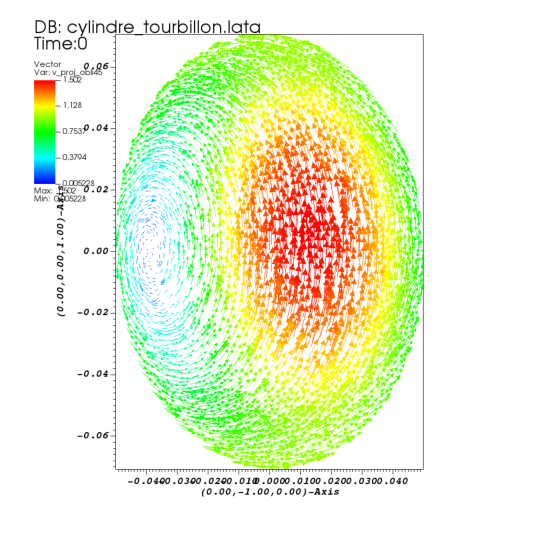

In [16]:
from trustutils import visit

a=visit.Show(time=0,empty=True)
a.visitCommand("OpenDatabase('cylindre_tourbillon.lata', 0)")
a.visitCommand("DefineVectorExpression('v_proj_obli45', '{VITESSE_X_ELEM_dom/2+VITESSE_Z_ELEM_dom/2,VITESSE_Y_ELEM_dom,VITESSE_X_ELEM_dom/2+VITESSE_Z_ELEM_dom/2}')")
a.visitCommand("AddPlot('Vector', 'v_proj_obli45', 1, 0)")
a.slice(origin=[0,0,0.075],normal=[-1,0,1.],type_op='slice_2D')
a.visitCommand("DrawPlots()")
a.plot()

## Quantitative comparisons
The results obtained with the two methods seem to be very close. In order to validate this feeling, we use two quantitative criteria: the comparison of the extrema of the velocity and the comparison of the surface flow rates. Finally, we increase the uncertainty on the values calculated by TRUST.
### Comparaison of extrema: tangential velocity 
In the case of the horizontal cut plane and then the sideway cut plane, the minimum and the maximum of the tangential velocity are compared with the post-processed values of TRUST and VisIt. The relative difference on the minima is not significant, it is necessarily large since we divide by a very small number. The relative difference on the maxima is very satisfactory, since it is less than $1%$.

The incline of the cut plane plays a significant influence on the reliability of the measurements, but this parameter seems to be the one whose influence is the most random. Moreover, in some cases it can not be varied. In the following we will be interested in 'coupe1', where the difference between the two methods is the most important.

In [17]:
from trustutils.jupyter import plot

columns=["Min",'Max']
Table=plot.Table(columns) 
Table.addLigne([["0.0","1.0"]],"Extrema theoretical ''Coupe1")

x1 = plot.loadText("Coupe1_extrm_trust")
x2 = plot.loadText("Coupe1_extrm_visit")

Table.addLigne([x1],"Vt Coupe1 TRUST") 
Table.addLigne([x2],"Vt Coupe1 VisIt") 
Table.addLigne([x1-x2],"Relative deviation VisIt/TRUST 'coupe1") 
Table.df

,Min,Max
Extrema theoretical ''Coupe1,0.0,1.0
Vt Coupe1 TRUST,0.018145,0.018145
Vt Coupe1 VisIt,0.023122,0.987596
Relative deviation VisIt/TRUST 'coupe1,-0.004977,-0.969451


### Comparison of extrema: normal velocity
One compares to their theoretical value the extrema of the speed on 'coupe1'. The relative difference on the maxima is less than $ 0.1% $. The difference between the minima is somewhat less good, but it remains correct since in both cases values less than $ 0.1 $ are obtained.

In [18]:
from trustutils.jupyter import plot 

columns=["Min",'Max']
Table=plot.Table(columns) 
Table.addLigne([["0.0","2.0"]],"Extrema theoretical ''Coupe1")

x1 = plot.loadText("Coupe1_extrm_vn_trust")
x2 = plot.loadText("Coupe1_extrm_vn_visit")

Table.addLigne([x1],"Vt Coupe1 TRUST") 
Table.addLigne([x2],"Vt Coupe1 VisIt") 
Table.addLigne([x1-x2],"Relative deviation VisIt/TRUST 'coupe1") 
Table.df

,Min,Max
Extrema theoretical ''Coupe1,0.0,2.0
Vt Coupe1 TRUST,0.066025,0.066025
Vt Coupe1 VisIt,0.04859,1.997876
Relative deviation VisIt/TRUST 'coupe1,0.017435,-1.931851


In [19]:
from trustutils import visit

#On recupere le debit min et max
a=visit.Show('cylindre_tourbillon.lata','Pseudocolor','VITESSE_Z_ELEM_dom',time=0,show=False)

a.slice(origin=[0,0,0.1],normal=[0,0,1.],type_op='slice_2D')

a.visitCommand("f=open('Global_debit','w')")
#on recupere le debit calcule sur coupe 1 avec trust
a.visitCommand("fichierDebR=open('Debit_ref','r')")
a.visitCommand("f.write(fichierDebR.read())")
a.visitCommand("fichierDebR.close()")


# on calcul le debit avec visit
a.visitCommand("SetTimeSliderState(0)")
a.visitCommand("DrawPlots()")
a.visitCommand("Query('Average Value')")
a.visitCommand("res=GetQueryOutputValue()")
a.visitCommand("f.write(\" \"+str(res))")
a.visitCommand("f.close()")
a.plot()

### Comparison of surface flow rates

With TRUST, the surface flux is calculated using the functions **Transformation** and **Reduction0d**. This is the average of the velocity on the surface, multiplied by the density (here $\rho = 1 kg.m^{-3}$). With VisIt, Querie ("Average Value") is used to obtain the average velocity field on the surface. This flow rate is calculated on the 'coupe1'. A reference line is added, the TRUST value is the flow rate given by the Debit.out file, while the VisIt value is a calculation of the average speed (numerically identical to the average flow rate here) across the volume. \
With TRUST and VisIt, flow rates are very slightly lower than the reference flow rates. The relative deviation with the reference values is of the order of $0.01%$, which shows that the interpolation error is negligible on the flow rate.

In [20]:
from trustutils.jupyter import plot 

columns=["TRUST","VisIt"]
Table=plot.Table(columns) 
Table.addLigne([["0.0","2.0"]],"Extrema theoretical Coupe1")

x1 = plot.loadText("Coupe1_debit")
x2 = plot.loadText("Global_debit")

Table.addLigne([x1],"Surface flow rate coupe1")   
Table.addLigne([x2],"Surface flow rate Reference")   
Table.addLigne([x1-x2],"Relative deviation coupe1")   
    
Table.df

,TRUST,VisIt
Extrema theoretical Coupe1,0.0,2.0
Surface flow rate coupe1,1.001277,1.001006
Surface flow rate Reference,1.001452,1.001006
Relative deviation coupe1,-0.000175,0.0


### Probabilistic approach for 'coupe1'
We can assimilate the different ways of calculating the field of velocities $ V_z $ to as many random variables of the space of the positions in the space of the velocities. We assume that there exists an error function $\epsilon$ under a normal law between the exact solution function $V_{z, e}$ and an interpolated function $ V_{z,i}$: 

$$V_{z, e} = V_{z, i} + \epsilon$$ 

We thus try to determine the expectation (E) and the variance (Var) of $\epsilon$, which correspond respectively to a difference in surface flow rate and to a difference in mass energy between the exact solution and the approximate solution. We also assume the independence between the approximate velocity and $\epsilon$. This allows us to obtain the expression: 

$$Var (V_{z, e}) = Var(V_{z, i}) + \sigma^2  \mbox{ where } \sigma^2=Var(\epsilon)$$

with $\sigma$ the standard deviation. As we know $Var(V_{z,e})$, we can compute $ Var(V_{z, i}) $, which allows us to obtain $\sigma^2$. By linearity of expectation, one easily gets $\mu$: 

$$E [V_{z, e}] = E[V_{z, i}] + \mu \mbox{ where } \mu= mean(\epsilon)$$ 

We get $E[V_{z,i}]$ and $Var[V_{z,i}]$ using \textbf{Transformation} and **Reduction_0d methode weighted_average** (cf  data file). $E[V_{z,e}]$ and $Var[V_{z,e}]$ are obtained from the analytical solution.

In [21]:
from trustutils.jupyter import plot

columns=[" "]
Table=plot.Table(columns) 
Table.addLigne([[1.0]],"$E[V_{z,e}]$")

a = plot.loadText("cylindre_tourbillon_DEBIT_PLAN1.son")
Table.addLigne([a[1]],"$E[V_{z,i}]$") 
Table.addLigne([[1.-a[1]]],"$\mu$") 

Table.addLigne([[0.333333333]],"$Var(V_{z,e})$")
b = plot.loadText("cylindre_tourbillon_VAR1.son")
Table.addLigne([b[1]],"$Var(V_{z,i})$") 
Table.addLigne([[1./3.-b[1]]],"$\sigma^2$") 

Table.df

,
"$E[V_{z,e}]$",1.000000
"$E[V_{z,i}]$",1.001277
$\mu$,-0.001277
"$Var(V_{z,e})$",0.333333
"$Var(V_{z,i})$",0.332151
$\sigma^2$,0.001183


### Confidence interval for TRUST interpolation

It is known that the error function $\epsilon$: 

$$\epsilon=V_{z,e}-V_{z,i}$$ 

follows a normal law of mean $\mu$ and standard deviation $\sigma$ (calculated with TRUST). Thus we can determine a confidence interval of $95\%$ for $V_{z,i}$: 

$$V_{z,e}+\mu-1.96\sigma<V_{z,i}<V_{z,e}+\mu+1.96\sigma$$ 

So in our case: 

$$V_{z,e}-6.87.0 \times 10^{-2}<V_{z,i}<V_{z,e}+6.61 \times 10^{-2}$$ 

An absolute error of velocity is obtained here, it can be used to increase the relative error. The closer you get to the center of the tube, the faster the flow, the absolute error is divided by a high velocity, so the relative error is small. On the contrary, when one approaches the edges, the velocity tends to 0, so one can not obtain an excess of the relative error with this method. In our case, the velocity is greater than $1 m/s$ as long as it is observed in a cylinder of radius $2/3$ of the maximum radius. Thus, on this central domain, it can be asserted with a $95\%$ confidence level that the relative error is increased by $7\%$.

### Remarks
The method used to estimate the relative error is rough, we could have a finer estimate by studying directly the random variable $\frac{V_{z,i}-V_{z,e}}{V_{z,e}}$. Moreover, the average values and the extrema of the velocity computed are very close to the theoretical values, with relative deviations of the order of $0.1%$ for the maximum and the flow rate. This leads us to believe that in reality the interpolated function is much closer to the exact function than the confidence interval obtained shows. Finally, it should not be forgotten that the influence of the mesh has not been studied at all, it is obviously determinative of the precision of the interpolation.

## Conclusion
In a first part we have shown with graphic illustrations that the interpolation and projection methods of TRUST and VisIt actually make it possible to obtain on a surface the total, tangential, and normal velocity fields. We then considered the accuracy of these methods by comparing the extrema, and the mean values of the velocity (corresponding to the flow rate). These computed quantities (with TRUST and VisIt) were compared between them, and with theoretical values. We observe very similar values, which seem to validate the two methods. Finally, a first confidence interval was established giving the uncertainty of the values calculated with TRUST. \
The influence of the mesh and the position of the cut plane can be studied in a future study.


## Data Files

### cylindre_tourbillon

In [22]:
from trustutils import run 
run.dumpDataset("./cylindre_tourbillon.data") 

 # laminar hydraulic problem #
 # PARALLEL OK #
 dimension 3
 domaine dom
 
 # BEGIN MESH #
 Read_MED short_family_names dom Mesh_perio_fine_3 cylindre_perio_fine_3.med
 dilate dom 0.001
 # END MESH #
 
 # BEGIN PARTITION
 Partition dom
 {
     Partition_tool metis { nb_parts 8 }
     Larg_joint 2
     zones_name DOM_dom
     periodique 1 perio
 }
 End
 END PARTITION #
 
 # BEGIN SCATTER
 Scatter DOM_dom.Zones dom 
 END SCATTER #
 
 vefprep1b dis 
 
 scheme_euler_implicit sch_statio 
 Read sch_statio
 {
   tinit 0 
   Solveur Implicite { seuil_convergence_solveur 1.e-12 }
   nb_pas_dt_max 1
 }
 uniform_field gravity 
 Read gravity 3 0. 0.0 0.0
 fluide_incompressible eau 
 Associate eau gravity
 Read eau
 {
   beta_th uniform_field  1 0.00018
   mu      uniform_field  1 1e-3
   rho     uniform_field  1 1.
   cp      uniform_field  1 4182.0
   lambda  uniform_field  1 0.597
 }
 pb_hydraulique pb 
 Associate pb dom
 Associate pb sch_statio
 Associate pb eau
 discretize pb dis
 
 domaine p